In [16]:
#This is a simple feedforward neural network with one hidden layer and sigmoidal units to teach the network to compute logic gates (AND, OR and XOR)

In [17]:
#The output will be logic gate AND, OR and XOR

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [19]:
#for plotting
aa = []
bb=[]
cc=[]

In [20]:
def finderror(target, v):
    return (np.power((v-target),2))*0.5

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [22]:
def sigmoid_prime(x):
    return x*(1-x)

In [23]:
#define learning rate
learningrate = 0.1

In [24]:
# training input set below 
u = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1],
              ])

In [25]:
#target output below, target output: (result for )
target = np.array([[0],
                   [1],
                   [1],
                   [0]])

In [26]:
#set random weight at start for input, first number is number of features for input, 
#2 binary numbers are used as input therefore only 2 features for input
#second number is number of nueron in hidden layer
wu = np.random.random((2,2))
#set random weight at start for hidden layer, first number is number of neuron in hidden layer, 
#second number is the number of possible output
wh = np.random.random((2,1))


In [27]:
#do learning for 1000 epoch
for iteration in range (20000):

    #Apply weight(wu) to input(u)
    #The weight will be updated at end of the loop in attempt to minimise the error
    wuu = np.dot(u, wu)

    #sigmoid activation applied on the weighted input to get the hidden layer(h)
    #sigmoid introduce non-linearity to the network so we can learn beyond linear regression
    h = sigmoid(wuu)

    #Apply weight(wh) to hidden layer
    whh = np.dot(h, wh)

    #sigmoid activation function applied to the weighted hidden layer to get output(v)
    v = sigmoid(whh)

    #find delta of error
    delta_error = v-target
    
    #-------------------------------------------------------------------------------------------
    #begin backpropadation

    #In order to know how much weight we should adjust, we need to find the derivative of loss function 
    #If we get the derivative, we can carry out gradient descent
    
    #chain rule has to be used in steps below 
    #so that we can get derivative of loss function in respect to the weight for each layer
    
    #find derivative of error function that was used on the hidden layer
    delta_whh = sigmoid_prime(v)

    #find weight to be adjusted that should be applied to hidden layer
    delta_wh = np.dot(h.T, delta_error * delta_whh)

    #find weight difference 
    delta_h = np.dot(delta_error * delta_whh,wh.T)

    #find derevative of error function that was used on the input
    delta_wuu = sigmoid_prime(h)

    #find weight to be adjusted that should be applied to input layer
    delta_wu = np.dot(u.T, delta_h * delta_wuu)

    #make adjustment to the weight of input layer according to wu
    wu = wu - learningrate * delta_wu
    
    #make adjustment to the weight according to delta_wh
    wh = wh - learningrate * delta_wh
    
    
    

    wudiff = np.average(delta_wu)
    whdiff = np.average(delta_wh)
    difference = np.average(abs(v-target))
    aa.append(difference)
    bb.append(wudiff)
    cc.append(whdiff)

Text(0.5, 0.98, 'Training done on XOR label')

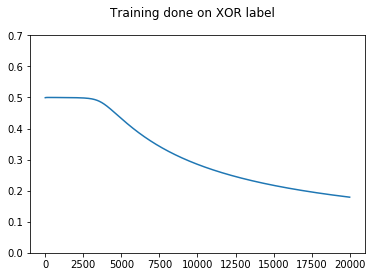

In [28]:
fig =plt.figure()
plt.plot(aa)
x1,x2,y1,y2=plt.axis()
plt.axis((x1,x2,0,0.7))
fig.suptitle('Training done on XOR label')

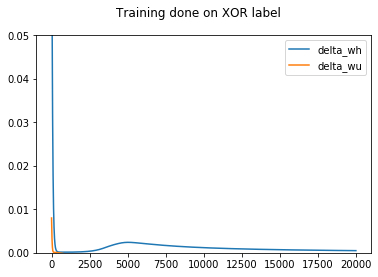

In [31]:
#weight change difference in first weight (wu)
fig=plt.figure()
plt.plot(cc,label='delta_wh')
plt.plot(bb,label='delta_wu')

x1,x2,y1,y2=plt.axis()
plt.axis((x1,x2,0,0.05))
fig.suptitle('Training done on XOR label')
plt.legend()
plt.show()

(-999.95, 20998.95, 0, 0.05)

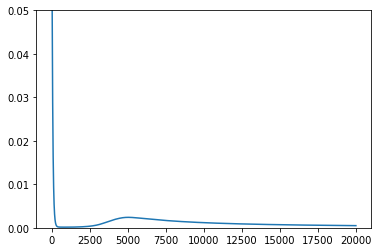

In [30]:
#weight change difference in second weight (wh)
plt.plot(cc)
x1,x2,y1,y2=plt.axis()
plt.axis((x1,x2,0,0.05))